In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
df =pd.read_csv('cardio.csv',sep=';')

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df["bmi"] = (df["weight"]/ (df["height"]/100)**2)

In [7]:
df["age"] = df["age"]/365

In [8]:
df["age"] = df["age"].astype("int")

In [9]:
df["height"] = df["height"]/100

In [10]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

In [11]:
df=df.drop(['id'],axis=1)

In [12]:
df["gender"] = df["gender"] % 2

In [13]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure
0,50,0,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48,0,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,0,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,40
69996,61,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,50
69997,52,0,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,90
69998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,55


In [14]:
x = df[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','bmi','pulse_pressure']]

In [15]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,pulse_pressure
0,50,0,1.68,62.0,110,80,1,1,0,0,1,21.967120,30
1,55,1,1.56,85.0,140,90,3,1,0,0,1,34.927679,50
2,51,1,1.65,64.0,130,70,3,1,0,0,0,23.507805,60
3,48,0,1.69,82.0,150,100,1,1,0,0,1,28.710479,50
4,47,1,1.56,56.0,100,60,1,1,0,0,0,23.011177,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,0,1.68,76.0,120,80,1,1,1,0,1,26.927438,40
69996,61,1,1.58,126.0,140,90,2,2,0,0,1,50.472681,50
69997,52,0,1.83,105.0,180,90,3,1,0,1,0,31.353579,90
69998,61,1,1.63,72.0,135,80,1,2,0,0,0,27.099251,55


In [16]:
y = df['cardio']

In [17]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [18]:
xtrain , xtest ,ytrain , ytest = train_test_split (x,y, test_size=.3,random_state=1)

In [19]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,pulse_pressure
23561,44,0,1.69,71.0,100,80,1,1,1,0,1,24.859074,20
34858,40,1,1.58,69.0,140,80,2,1,0,0,1,27.639801,60
54953,56,1,1.64,65.0,120,80,1,1,0,0,1,24.167162,40
59230,45,1,1.53,53.0,100,60,1,1,0,0,1,22.640865,40
1730,57,1,1.59,71.0,140,90,1,1,0,0,1,28.084332,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,58,0,1.75,78.0,120,80,1,1,0,0,1,25.469388,40
20609,52,1,1.64,68.0,120,80,1,1,0,0,0,25.282570,40
21440,49,0,1.78,82.0,120,80,1,1,0,0,1,25.880571,40
50057,60,1,1.69,77.0,120,80,1,1,0,0,0,26.959840,40


In [20]:
xtest

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,pulse_pressure
6670,44,1,1.53,93.0,140,90,1,1,0,0,1,39.728310,50
49567,39,1,1.57,89.0,120,80,1,1,0,0,1,36.106941,40
50796,54,1,1.65,66.0,150,90,1,1,0,0,1,24.242424,60
22310,49,0,1.76,88.0,160,100,2,2,1,1,1,28.409091,60
54037,46,0,1.65,78.0,140,90,1,1,0,0,0,28.650138,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,50,1,1.70,70.0,120,80,1,1,0,0,1,24.221453,40
25200,57,1,1.65,60.0,120,70,3,1,0,0,1,22.038567,50
7366,40,1,1.70,68.0,100,60,1,1,0,0,1,23.529412,40
56399,60,1,1.65,66.0,110,80,1,1,0,0,1,24.242424,30


In [22]:
logistic = LogisticRegression()

In [23]:
logistic.fit(xtrain,ytrain)

C:\Users\Samran Rahman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
logistic.score(xtest,ytest)

0.7186666666666667

In [25]:
from sklearn.model_selection import cross_val_score

In [27]:
cv_score_logistic = cross_val_score(logistic,x,y,cv=10)

C:\Users\Samran Rahman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samran Rahman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samran Rahman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samran Rahman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Samran Rahman\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [28]:
cv_score_logistic

array([0.71689759, 0.71257143, 0.72271429, 0.72842857, 0.71657143,
       0.72071429, 0.72357143, 0.72957143, 0.71942857, 0.71595942])

In [29]:
cv_score_logistic.mean()

0.7206428437405246

In [31]:
pred_logistic = logistic.predict(xtest)

In [32]:
pred_logistic

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(ytest,pred_logistic)

0.7186666666666667

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(ytest,pred_logistic)

array([[7991, 2361],
       [3547, 7101]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(ytest,pred_logistic))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73     10352
           1       0.75      0.67      0.71     10648

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



In [39]:
logistic_probs = logistic.predict_proba(xtest)
logistic_probs = logistic_probs[:, 1]

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
logistic_auc = roc_auc_score(ytest, logistic_probs)

In [42]:
print('Logistic: AUROC = %.3f' % (logistic_auc))

Logistic: AUROC = 0.786


In [43]:
logistic_fpr, logistic_tpr, _ = roc_curve(ytest, logistic_probs)

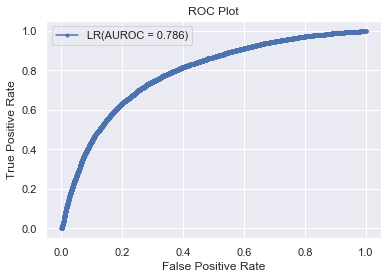

In [45]:
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='LR(AUROC = %0.3f)' % logistic_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()